## SHAP 실습 예제

### 라이브러리 준비

In [1]:
!pip install shap

In [2]:
import shap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

### 데이터 준비

In [3]:
# 데이터 로드
housing = fetch_california_housing()
X, y = housing.data, housing.target

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 모델 학습

In [4]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### SHAP 값 계산

In [5]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

### 시각화

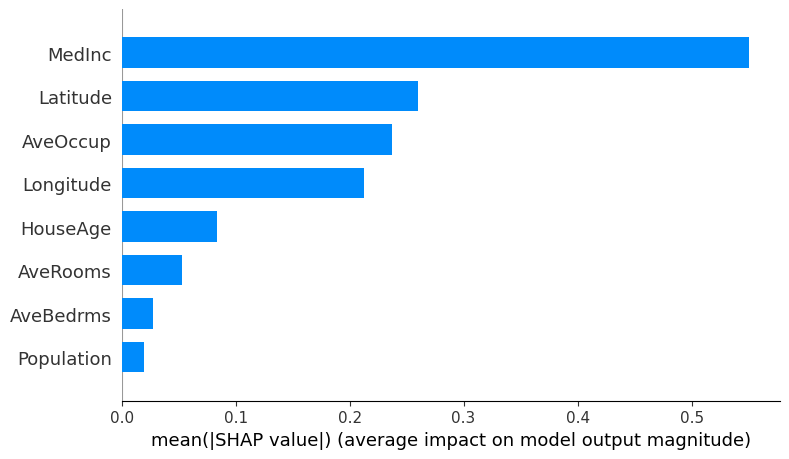

In [6]:
# SHAP Summary Plot (막대 그림)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=housing.feature_names)

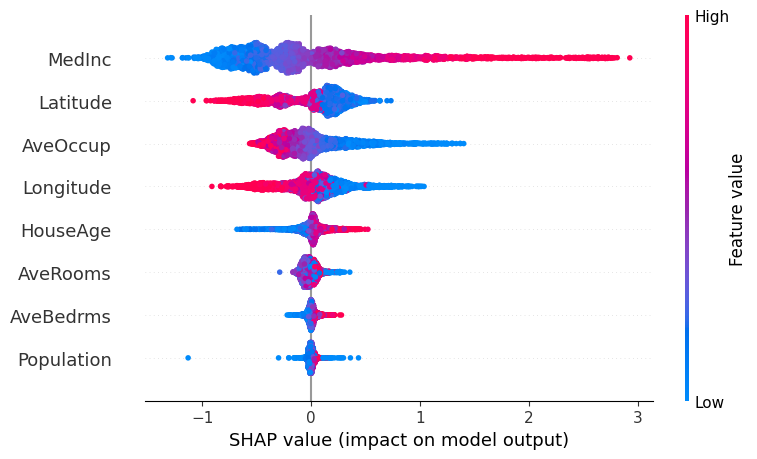

In [7]:
# SHAP Summary Plot (점 그림)
shap.summary_plot(shap_values, X_test, plot_type="dot", feature_names=housing.feature_names)

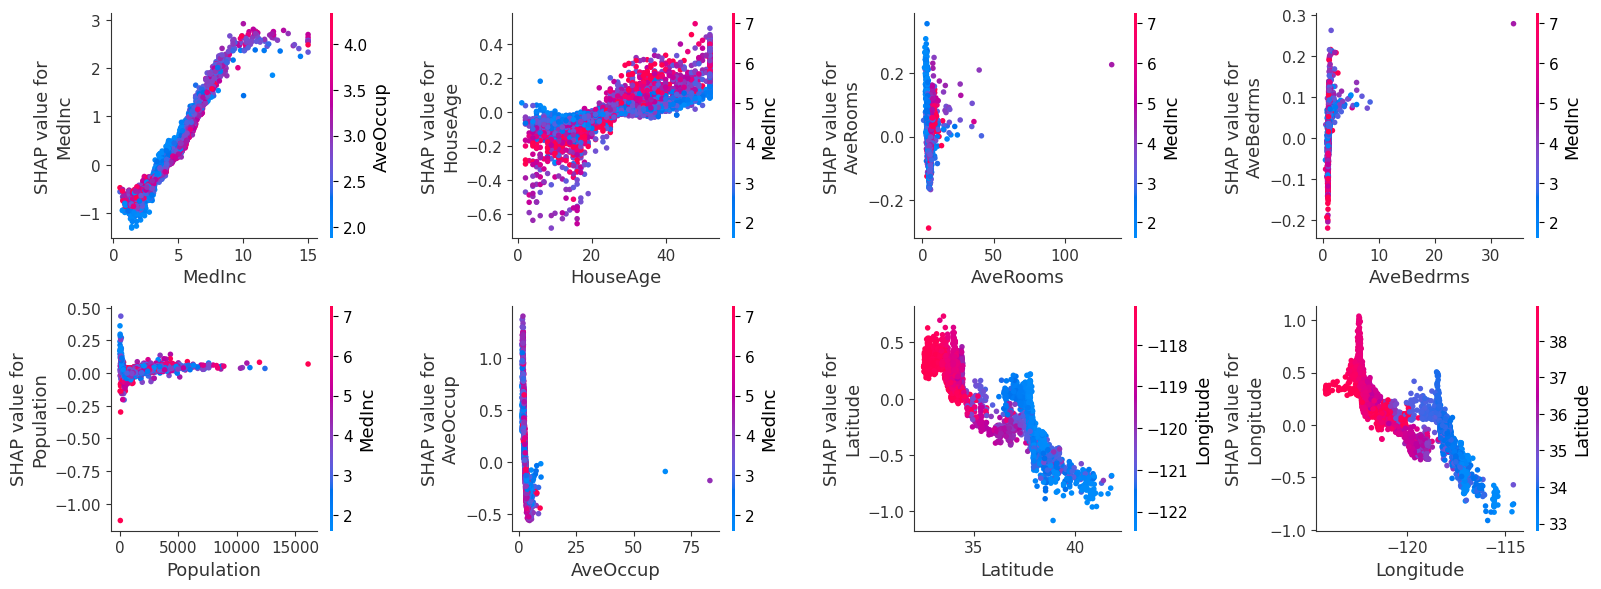

In [8]:
# SHAP Dependence Plot (2x4 서브플롯)
fig, axes = plt.subplots(2, 4, figsize=(16, 6))
axes = axes.flatten()

for i, feature in enumerate(housing.feature_names):
    shap.dependence_plot(
        feature, 
        shap_values, 
        X_test, 
        feature_names=housing.feature_names,
        ax=axes[i],
        show=False
    )

plt.tight_layout()
plt.show()

In [9]:
# 개별 예측 설명
sample_idx = 0
shap.force_plot(explainer.expected_value, shap_values[sample_idx,:], X_test[sample_idx,:], feature_names=housing.feature_names)